### Context: Customers form the pillar of any business.At present through the use of data, predicting whether a customer would be satisfied or not has become quite crucial. If the companies can understand beforehand that a customer would be unhappy, they can take some relevant measures, as no business wants dissatisfied customers.This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel.There was a Survey data taken from over 95K passengers. The on-time performance of the trains along with passenger information is in a file named ‘Traveldata_train.csv’. These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report ‘Surveydata_train.csv’.


### The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train. Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
df_1=pd.read_csv('Traveldata_train.csv')

In [3]:
df_1.shape

(94379, 9)

In [4]:
df_1.head().T

,0,1,2,3,4
ID,98800001,98800002,98800003,98800004,98800005
Gender,Female,Male,Female,Female,Female
CustomerType,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,52.0,48.0,43.0,44.0,50.0
TypeTravel,NaN,Personal Travel,Business travel,Business travel,Business travel
Travel_Class,Business,Eco,Business,Business,Business
Travel_Distance,272,2200,1061,780,1981
DepartureDelay_in_Mins,0.0,9.0,77.0,13.0,0.0
ArrivalDelay_in_Mins,5.0,0.0,119.0,18.0,0.0


In [5]:
df_2=pd.read_csv('Surveydata_train.csv')

In [6]:
df_2.shape

(94379, 17)

In [7]:
df_2.head().T

,0,1,2,3,4
ID,98800001,98800002,98800003,98800004,98800005
Overall_Experience,0,0,1,0,1
Seat_comfort,need improvement,poor,need improvement,acceptable,acceptable
Seat_Class,Green Car,Ordinary,Green Car,Ordinary,Ordinary
Arrival_time_convenient,excellent,excellent,need improvement,need improvement,acceptable
Catering,excellent,poor,need improvement,NaN,acceptable
Platform_location,very convinient,need improvement,need improvement,need improvement,manageable
Onboardwifi_service,good,good,need improvement,acceptable,need improvement
Onboard_entertainment,need improvement,poor,good,need improvement,good
Online_support,acceptable,good,excellent,acceptable,excellent


In [8]:
df = pd.concat([df_1, df_2], axis=1, join='inner')

In [9]:
df.shape

(94379, 26)

In [10]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,98800001,98800002,98800003,98800004,98800005,98800006,98800007,98800008,98800009,98800010
Gender,Female,Male,Female,Female,Female,Male,Male,Male,Male,Male
CustomerType,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,52.0,48.0,43.0,44.0,50.0,44.0,56.0,65.0,22.0,57.0
TypeTravel,NaN,Personal Travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Personal Travel,Business travel
Travel_Class,Business,Eco,Business,Business,Business,Business,Eco,Business,Eco,Business
Travel_Distance,272,2200,1061,780,1981,2810,2029,853,1636,306
DepartureDelay_in_Mins,0.0,9.0,77.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0
ArrivalDelay_in_Mins,5.0,0.0,119.0,18.0,0.0,0.0,0.0,3.0,0.0,0.0
ID,98800001,98800002,98800003,98800004,98800005,98800006,98800007,98800008,98800009,98800010


In [11]:
df = df.drop('ID',axis=1)

In [12]:
df.shape

(94379, 24)

In [13]:
df.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins',
       'Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   CustomerType             85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   TypeTravel               85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   DepartureDelay_in_Mins   94322 non-null  float64
 7   ArrivalDelay_in_Mins     94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_time_convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_location        94349 non-null  object 
 14  Onboardwifi_service   

In [15]:
df.isnull().sum()

Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

<AxesSubplot:>

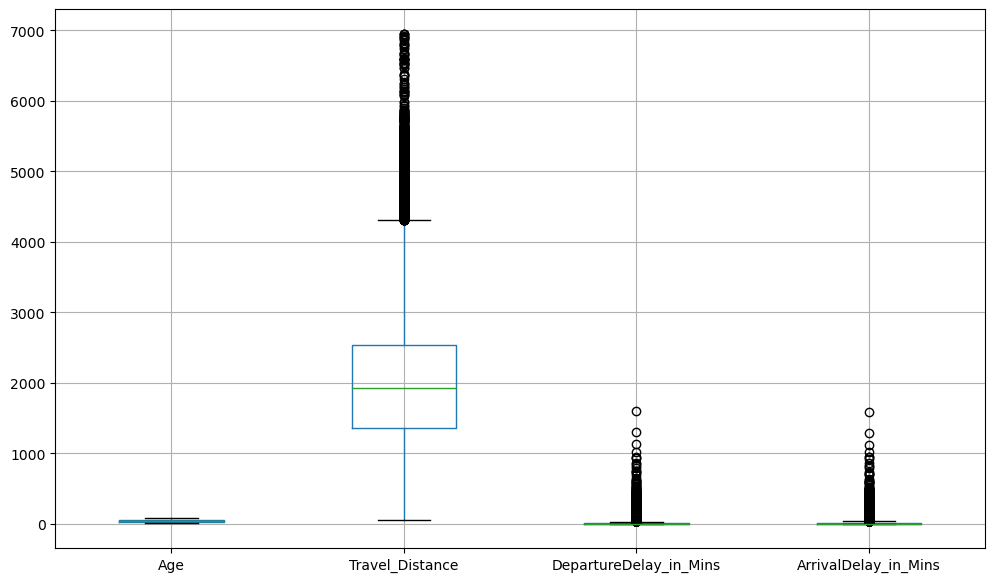

In [16]:
plt.figure(figsize=(12,7))
df[['Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class',
       'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins','Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding']].boxplot()

In [17]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts(normalize=False))
        print('\n')

Gender
Female    47815
Male      46487
Name: Gender, dtype: int64


CustomerType
Loyal Customer       69823
disloyal Customer    15605
Name: CustomerType, dtype: int64


TypeTravel
Business travel    58617
Personal Travel    26536
Name: TypeTravel, dtype: int64


Travel_Class
Eco         49342
Business    45037
Name: Travel_Class, dtype: int64


Seat_comfort
acceptable          21158
need improvement    20946
good                20595
poor                15185
excellent           12971
extremely poor       3463
Name: Seat_comfort, dtype: int64


Seat_Class
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64


Arrival_time_convenient
good                19574
excellent           17684
acceptable          15177
need improvement    14990
poor                13692
extremely poor       4332
Name: Arrival_time_convenient, dtype: int64


Catering
acceptable          18468
need improvement    17978
good                17969
poor                13858
excellent           13455
e

In [18]:
median10=df["Age"].median()
df["Age"].replace(np.nan,median10,inplace=True)

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['DepartureDelay_in_Mins'] = imputer.fit_transform(df[['DepartureDelay_in_Mins']])
df['ArrivalDelay_in_Mins'] = imputer.fit_transform(df[['ArrivalDelay_in_Mins']])

In [20]:
df.isnull().sum()

Gender                       77
CustomerType               8951
Age                           0
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins        0
ArrivalDelay_in_Mins          0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [21]:
mode1=df["Gender"].mode().values[0]
mode2=df["CustomerType"].mode().values[0]
mode3=df["TypeTravel"].mode().values[0]
mode4=df["Arrival_time_convenient"].mode().values[0]
mode5=df["Catering"].mode().values[0]
mode6=df["Onboard_service"].mode().values[0]
mode7=df["Leg_room"].mode().values[0]
mode8=df["Baggage_handling"].mode().values[0]
mode9=df["Checkin_service"].mode().values[0]
mode10=df["Cleanliness"].mode().values[0]
mode11=df["Online_boarding"].mode().values[0]

df["Gender"].replace(np.nan,mode1,inplace=True)
df["CustomerType"].replace(np.nan,mode2,inplace=True)
df["TypeTravel"].replace(np.nan,mode3,inplace=True)
df["Arrival_time_convenient"].replace(np.nan,mode4,inplace=True)
df["Catering"].replace(np.nan,mode5,inplace=True)
df["Onboard_service"].replace(np.nan,mode6,inplace=True)
df["Leg_room"].replace(np.nan,mode7,inplace=True)
df["Baggage_handling"].replace(np.nan,mode8,inplace=True)
df["Checkin_service"].replace(np.nan,mode9,inplace=True)
df["Cleanliness"].replace(np.nan,mode10,inplace=True)
df["Online_boarding"].replace(np.nan,mode11,inplace=True)


In [22]:
mode12=df["Seat_comfort"].mode().values[0]
mode13=df["Platform_location"].mode().values[0]
mode14=df["Onboardwifi_service"].mode().values[0]
mode15=df["Onboard_entertainment"].mode().values[0]
mode16=df["Online_support"].mode().values[0]
mode17=df["Onlinebooking_Ease"].mode().values[0]



df["Seat_comfort"].replace(np.nan,mode12,inplace=True)
df["Platform_location"].replace(np.nan,mode13,inplace=True)
df["Onboardwifi_service"].replace(np.nan,mode14,inplace=True)
df["Onboard_entertainment"].replace(np.nan,mode15,inplace=True)
df["Online_support"].replace(np.nan,mode16,inplace=True)
df["Onlinebooking_Ease"].replace(np.nan,mode17,inplace=True)

In [23]:
df.isnull().sum()

Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

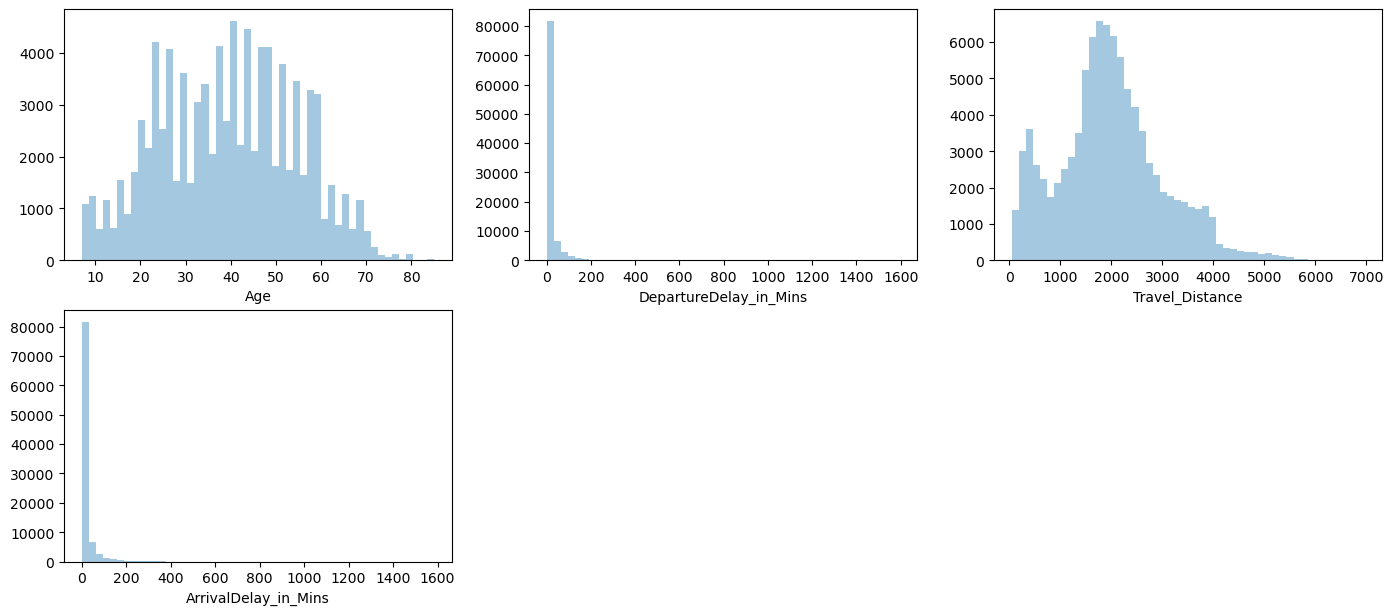

In [24]:
#Distplots of all numerical variables:
plt.figure(figsize=(17,15))
a=1
for i in ['Age','DepartureDelay_in_Mins','Travel_Distance','ArrivalDelay_in_Mins']:
    plt.subplot(4,3,a)
    sns.distplot(df[i],kde = False)
    a+=1


In [25]:
cat_cols = ['Gender', 'CustomerType', 'TypeTravel', 'Travel_Class',
         'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding']

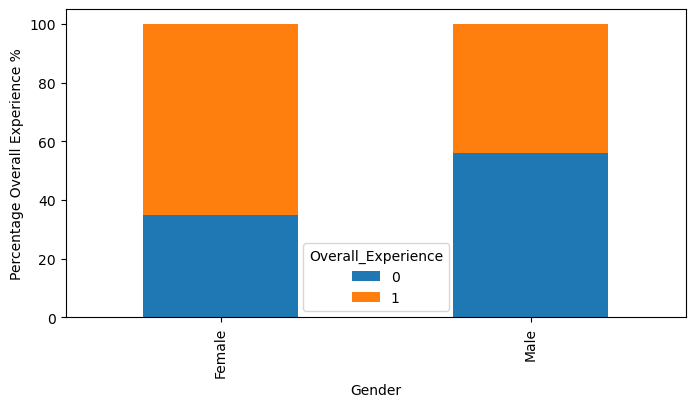

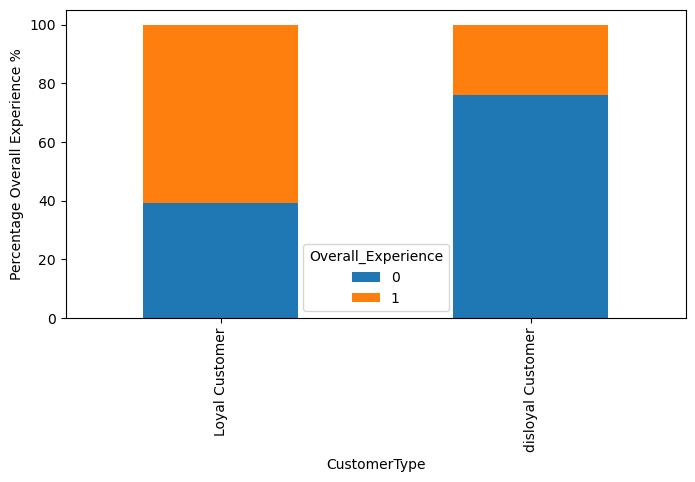

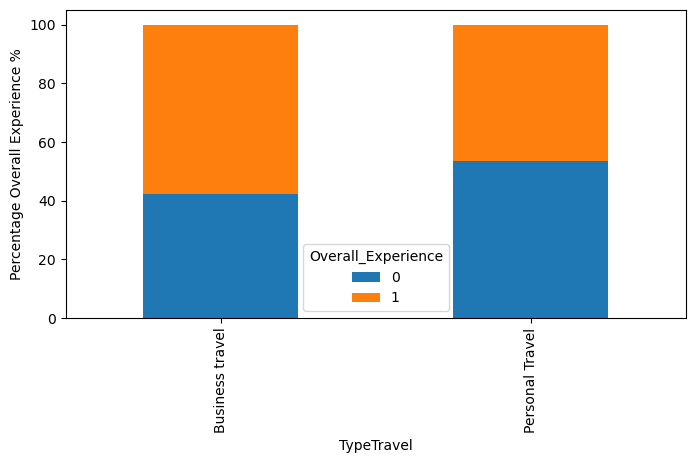

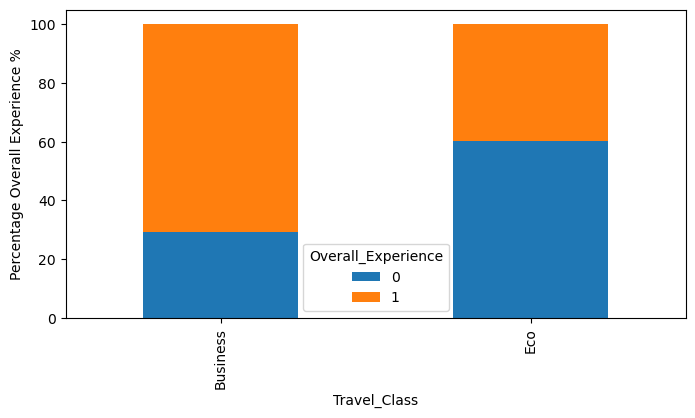

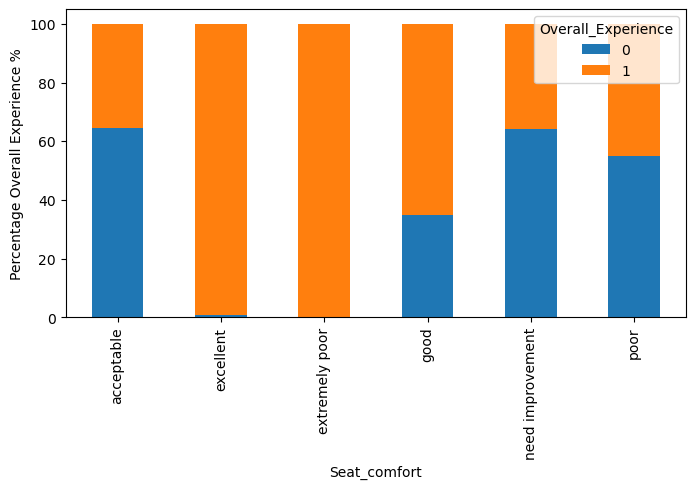

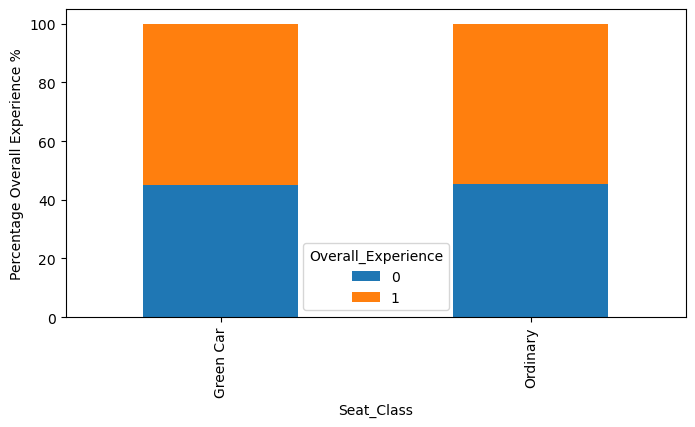

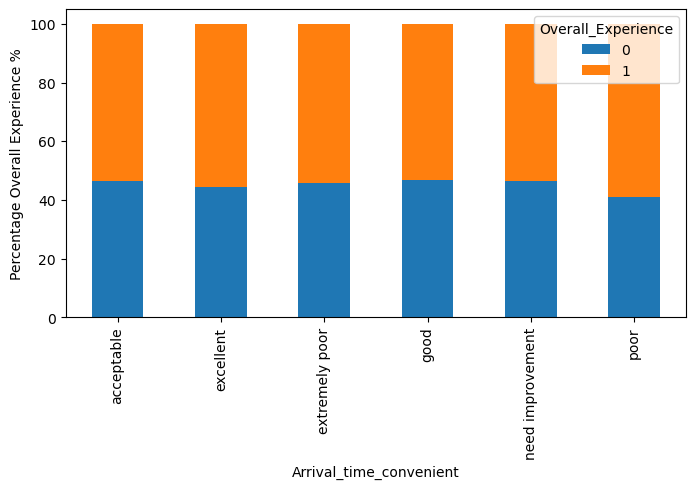

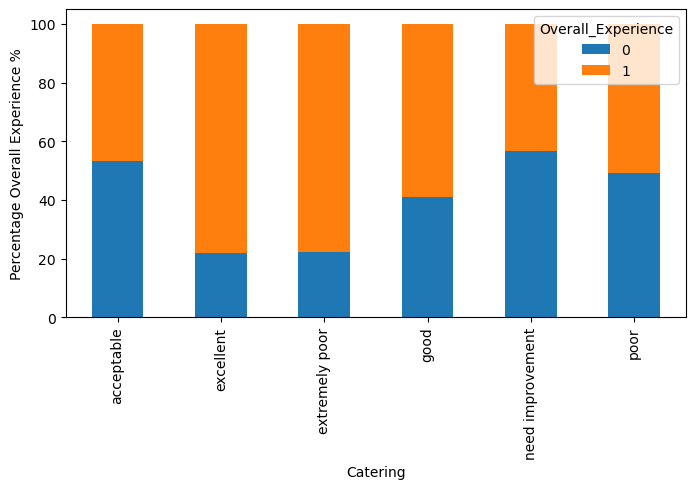

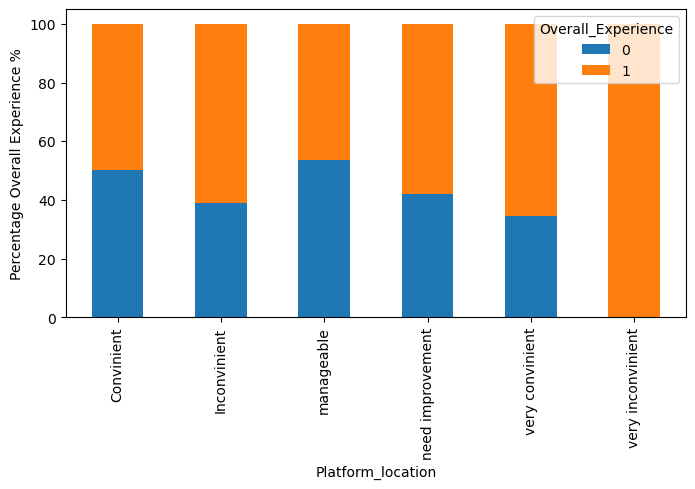

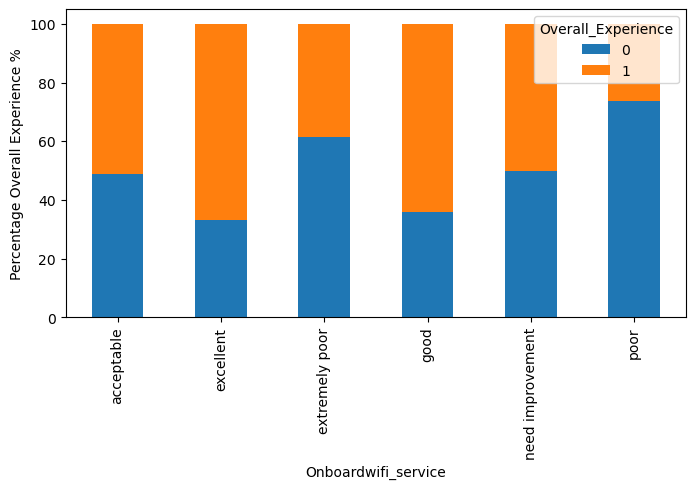

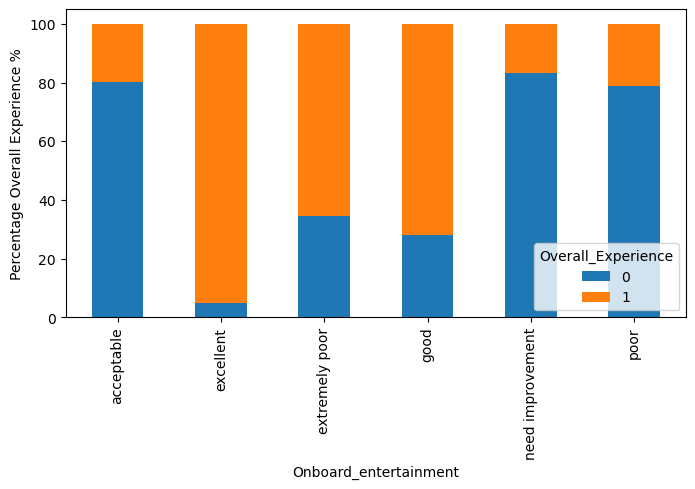

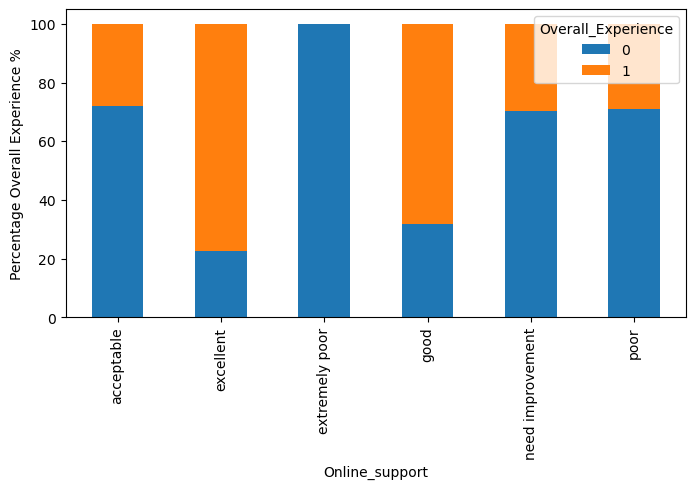

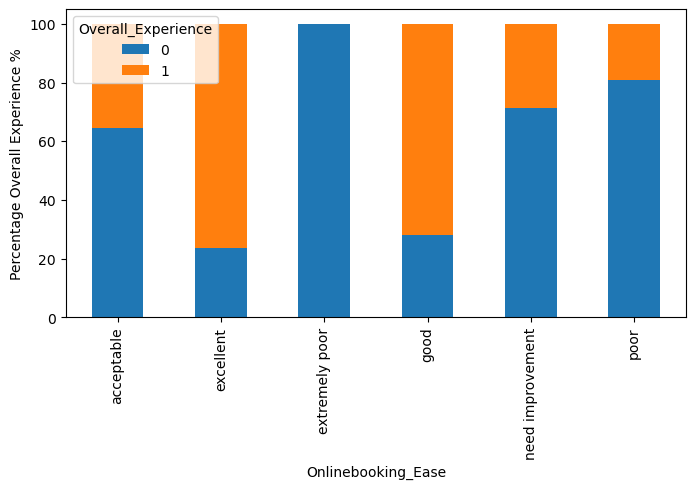

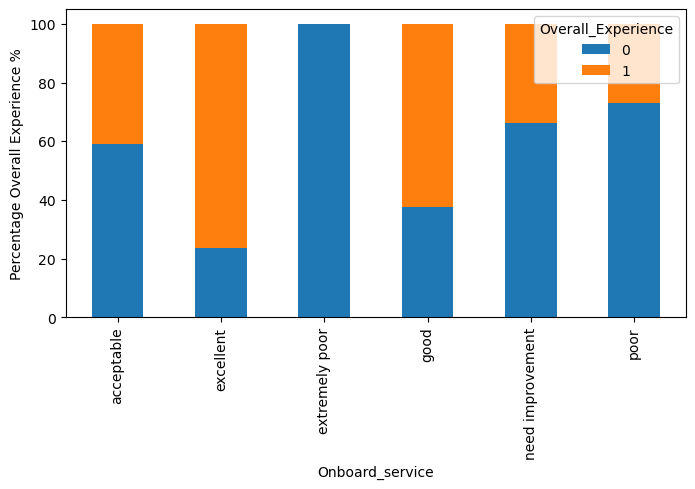

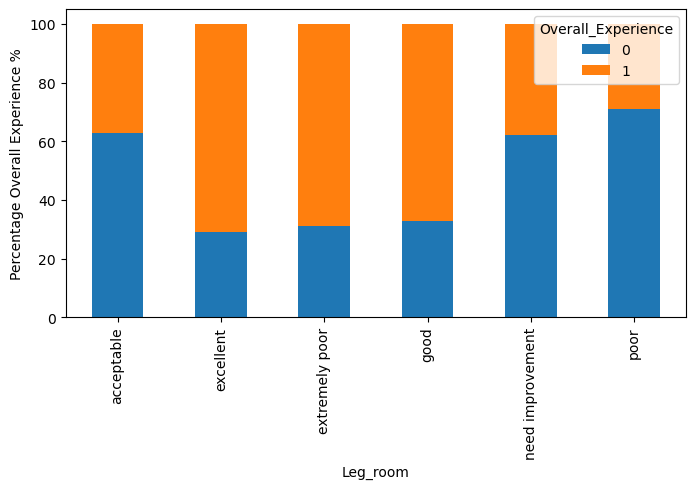

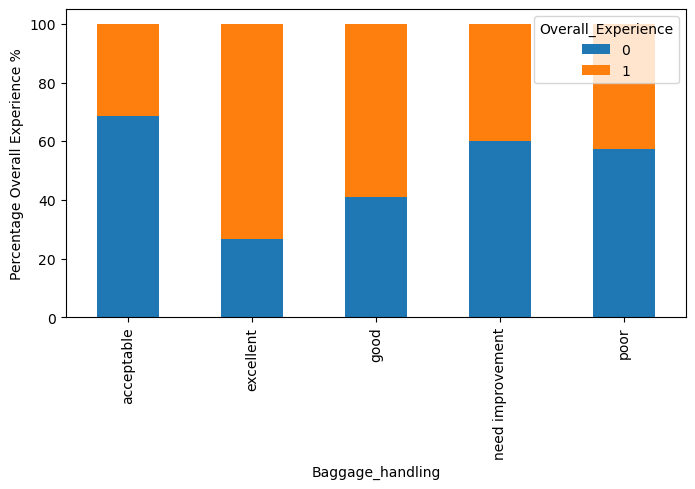

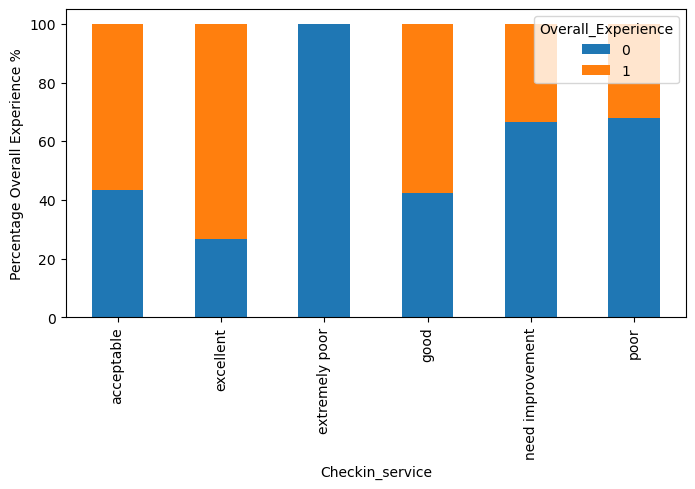

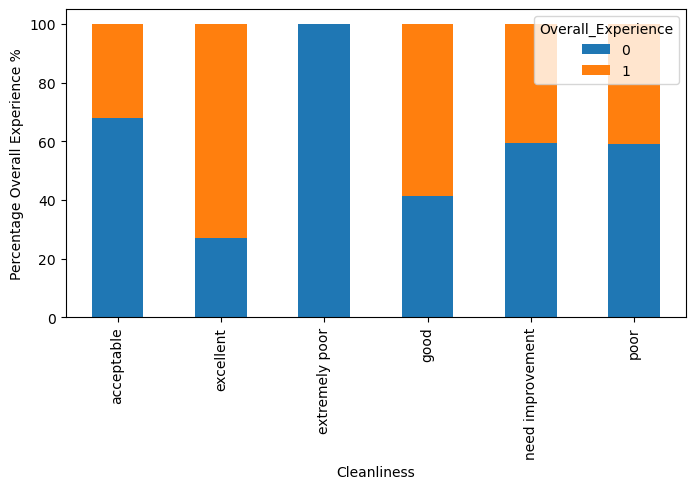

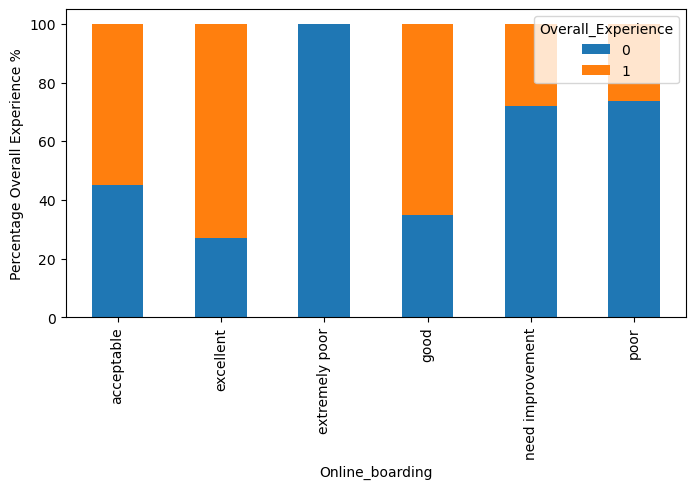

In [26]:
for i in cat_cols:
    if i != 'Overall_Experience':
        (pd.crosstab(df[i], df['Overall_Experience'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Overall Experience %')

In [27]:
#Chi Square Test
from scipy.stats import chi2_contingency

In [28]:
def chi_square(crosstab):
    stat, p, dof, expected = chi2_contingency(crosstab)
    print(p)

In [29]:
for i in cat_cols:
    print(i)
    ct=pd.crosstab(df[i],df["Overall_Experience"])
    chi_square(ct)

Gender
0.0
CustomerType
0.0
TypeTravel
1.9008659096558603e-210
Travel_Class
0.0
Seat_comfort
0.0
Seat_Class
0.3613704633310514
Arrival_time_convenient
1.7960871077335572e-27
Catering
0.0
Platform_location
0.0
Onboardwifi_service
0.0
Onboard_entertainment
0.0
Online_support
0.0
Onlinebooking_Ease
0.0
Onboard_service
0.0
Leg_room
0.0
Baggage_handling
0.0
Checkin_service
0.0
Cleanliness
0.0
Online_boarding
0.0


In [30]:
df=pd.get_dummies(df, columns=['Travel_Class','CustomerType','Gender','TypeTravel'], 
                       drop_first=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             94379 non-null  float64
 1   Travel_Distance                 94379 non-null  int64  
 2   DepartureDelay_in_Mins          94379 non-null  float64
 3   ArrivalDelay_in_Mins            94379 non-null  float64
 4   Overall_Experience              94379 non-null  int64  
 5   Seat_comfort                    94379 non-null  object 
 6   Seat_Class                      94379 non-null  object 
 7   Arrival_time_convenient         94379 non-null  object 
 8   Catering                        94379 non-null  object 
 9   Platform_location               94379 non-null  object 
 10  Onboardwifi_service             94379 non-null  object 
 11  Onboard_entertainment           94379 non-null  object 
 12  Online_support                  

In [32]:
Col_L=['Seat_comfort','Arrival_time_convenient','Catering','Onboardwifi_service','Onboard_entertainment','Online_support','Onlinebooking_Ease',
      'Onboard_service','Leg_room','Baggage_handling','Checkin_service','Cleanliness','Online_boarding']

for i in Col_L:
    df[i]=np.where(df[i] =='extremely poor', '0', df[i])
    df[i]=np.where(df[i] =='poor', '1', df[i])
    df[i]=np.where(df[i] =='need improvement', '2', df[i])
    df[i]=np.where(df[i] =='acceptable', '3', df[i])
    df[i]=np.where(df[i] =='good', '4', df[i])
    df[i]=np.where(df[i] =='excellent', '5', df[i])
    df[[i]] = df[[i]].apply(pd.to_numeric) 



In [33]:
    i = 'Seat_Class'
    df[i]=np.where(df[i] =='Green Car', '1', df[i])
    df[i]=np.where(df[i] =='Ordinary', '0', df[i])
    df[[i]] = df[[i]].apply(pd.to_numeric) 
    

In [34]:
    i="Platform_location"
    df[i]=np.where(df[i] =='very inconvinient', '0', df[i])
    df[i]=np.where(df[i] =='Inconvinient', '1', df[i])
    df[i]=np.where(df[i] =='need improvement', '2', df[i])
    df[i]=np.where(df[i] =='manageable', '3', df[i])
    df[i]=np.where(df[i] =='Convinient', '4', df[i])
    df[i]=np.where(df[i] =='very convinient', '5', df[i])
    df[[i]] = df[[i]].apply(pd.to_numeric) 

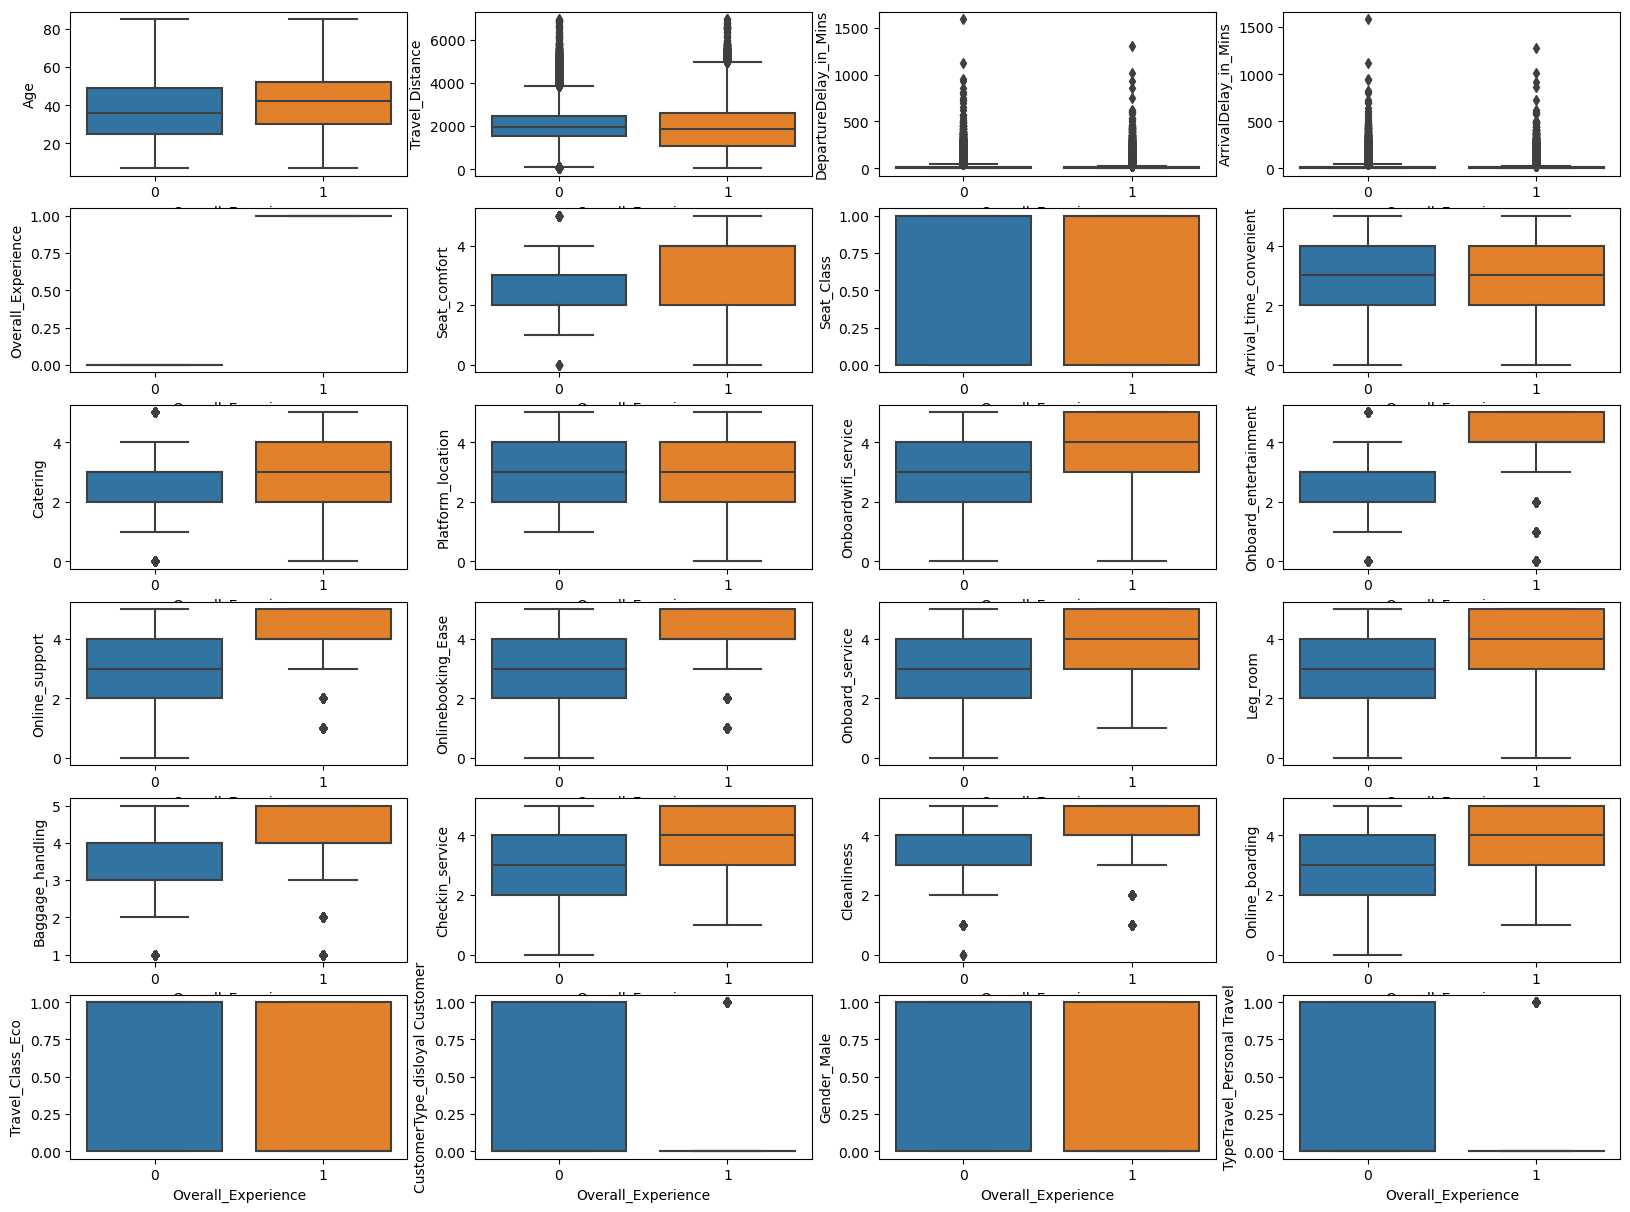

In [35]:
plt.figure(figsize=(20,20))
a=1
for i in df.columns:
    plt.subplot(8,4,a)
    sns.boxplot(x=df['Overall_Experience'],y=df[i])
    a+=1

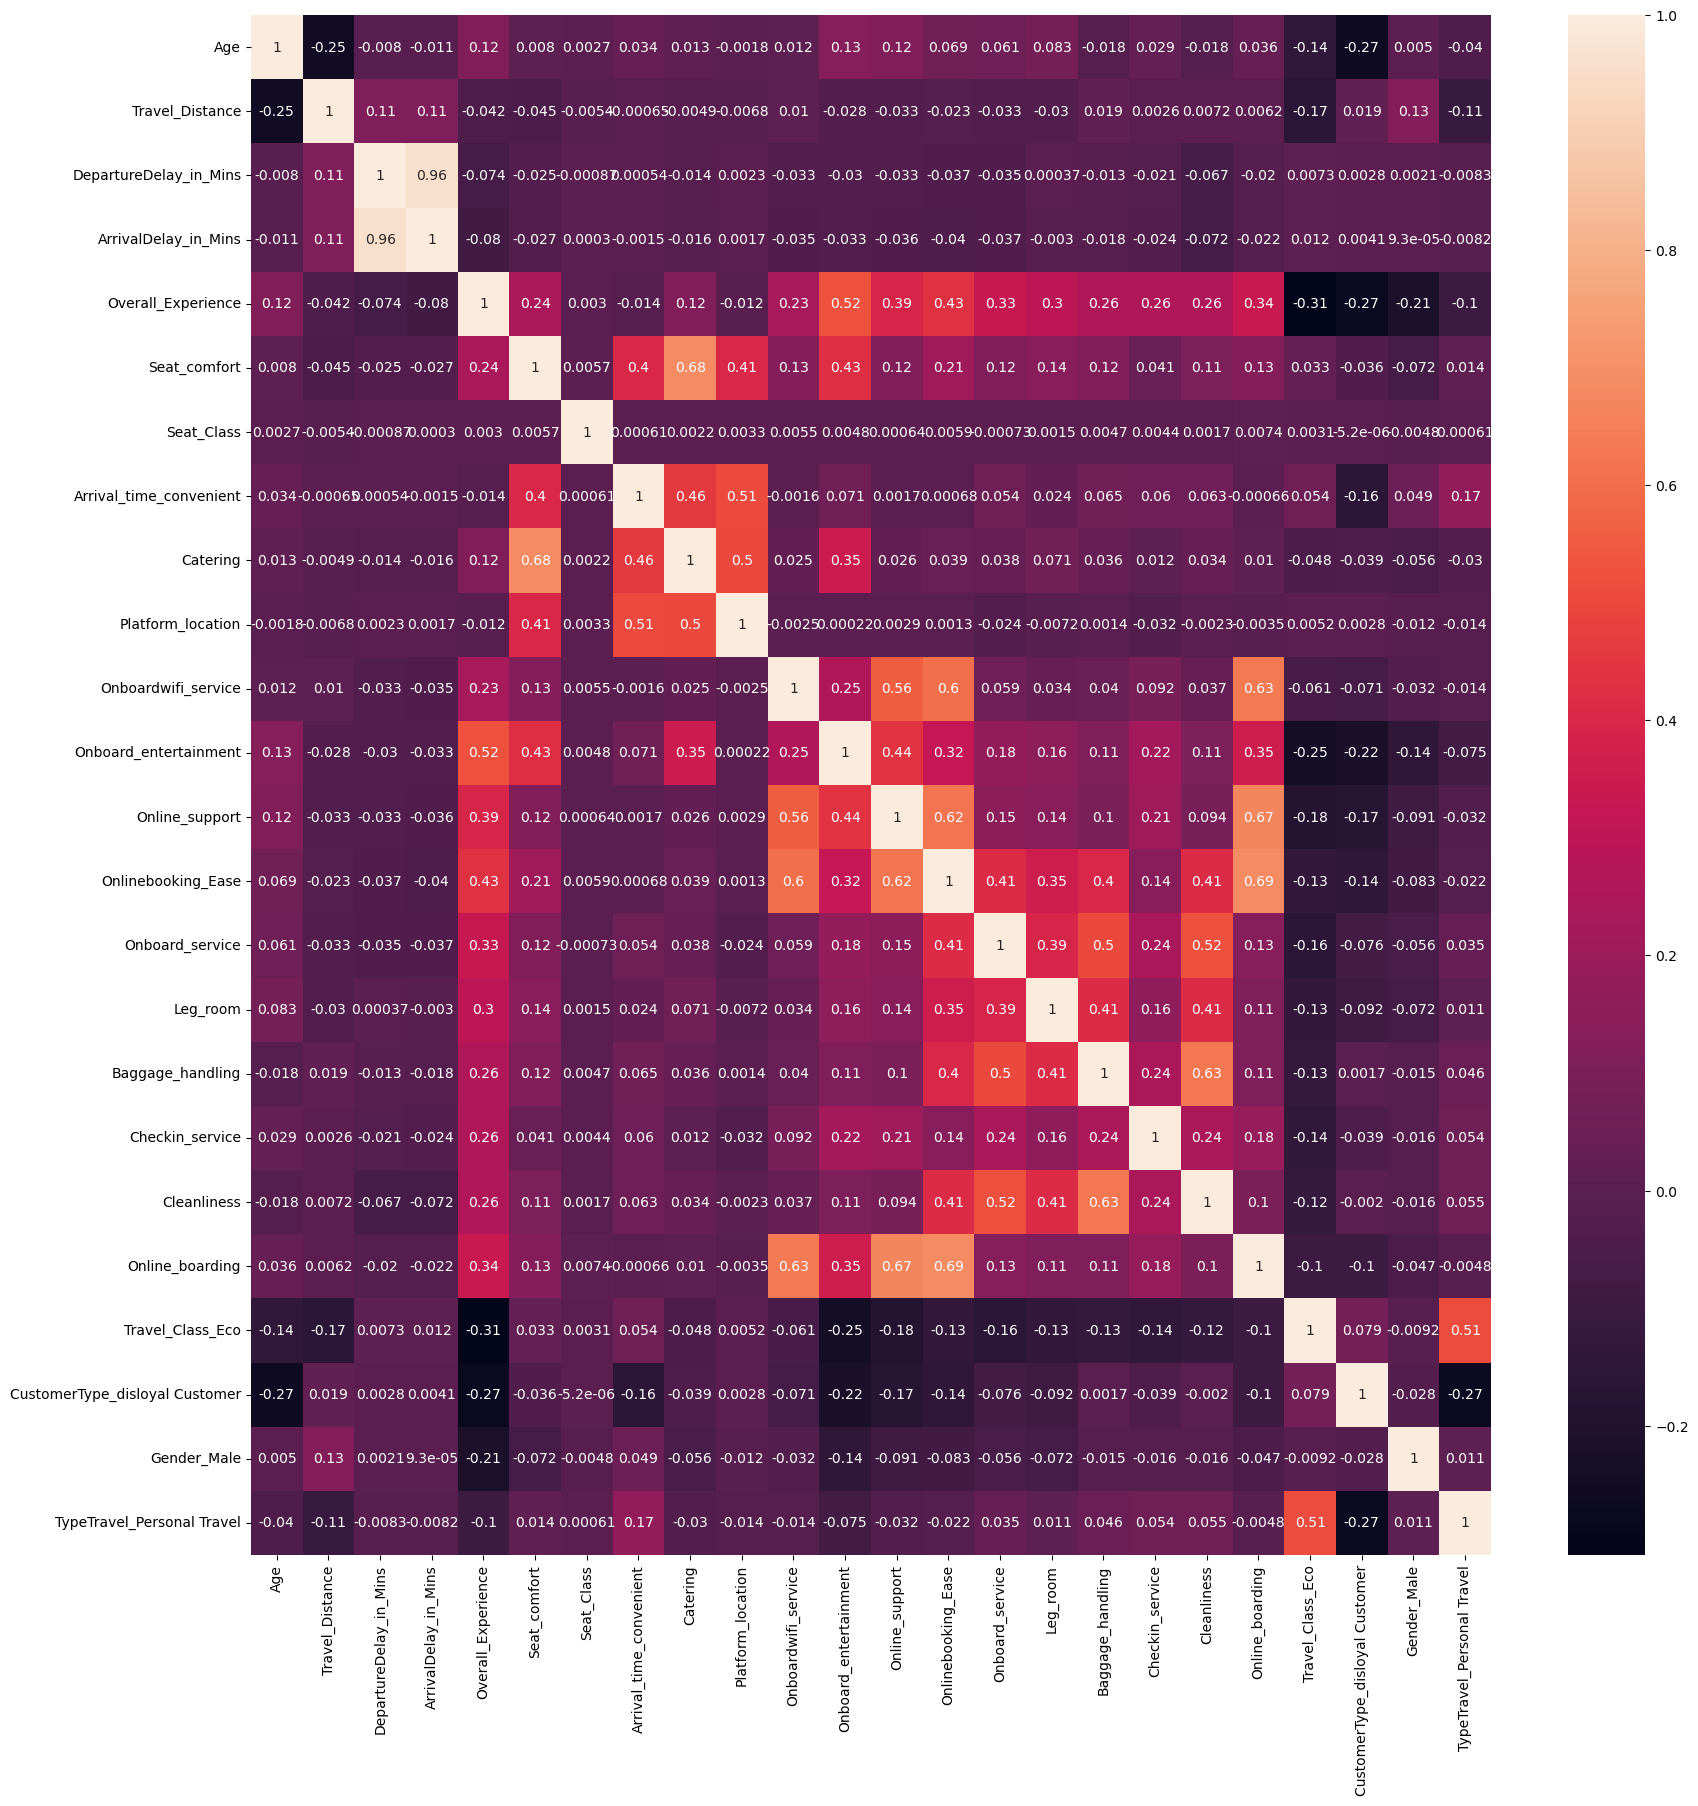

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [37]:
df = df.drop('ArrivalDelay_in_Mins',axis=1)
df = df.drop('Seat_Class',axis=1)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             94379 non-null  float64
 1   Travel_Distance                 94379 non-null  int64  
 2   DepartureDelay_in_Mins          94379 non-null  float64
 3   Overall_Experience              94379 non-null  int64  
 4   Seat_comfort                    94379 non-null  int64  
 5   Arrival_time_convenient         94379 non-null  int64  
 6   Catering                        94379 non-null  int64  
 7   Platform_location               94379 non-null  int64  
 8   Onboardwifi_service             94379 non-null  int64  
 9   Onboard_entertainment           94379 non-null  int64  
 10  Online_support                  94379 non-null  int64  
 11  Onlinebooking_Ease              94379 non-null  int64  
 12  Onboard_service                 

In [39]:
X = df.drop("Overall_Experience", axis=1)

y = df.pop("Overall_Experience")

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##### Grid search on Bagging with decision tree 

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


DT_params = {"base_estimator__max_depth": [17],
              "base_estimator__max_features": [0.3],    
            "base_estimator__min_samples_split": [2],
            "base_estimator__min_samples_leaf": [2],
          "base_estimator__criterion":['entropy'],
        'n_estimators': [450],
}


bc_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state = 1),random_state=1), DT_params, scoring="accuracy", verbose=1,n_jobs=-1).fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [42]:
bc_gs.best_params_


{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 17,
 'base_estimator__max_features': 0.3,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 2,
 'n_estimators': 450}

In [43]:
best_Grid_Bagging_DT = bc_gs.best_estimator_


In [44]:
ytrain_predict_Bagging_DT = best_Grid_Bagging_DT.predict(X_train)
ytest_predict_Bagging_DT = best_Grid_Bagging_DT.predict(X_test)

print(metrics.confusion_matrix(y_train,ytrain_predict_Bagging_DT))
print(classification_report(y_train,ytrain_predict_Bagging_DT))
print(" ")
print(metrics.confusion_matrix(y_test,ytest_predict_Bagging_DT))
print(classification_report(y_test,ytest_predict_Bagging_DT))

#ytest_predict_Bagging_DT

[[29681   318]
 [  751 35315]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29999
           1       0.99      0.98      0.99     36066

    accuracy                           0.98     66065
   macro avg       0.98      0.98      0.98     66065
weighted avg       0.98      0.98      0.98     66065

 
[[12228   559]
 [  816 14711]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12787
           1       0.96      0.95      0.96     15527

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



Inference on Training data:
1.	98% of prediction that overall experience will not be good is correct
2.	99% of overall experience will not be good are correctly predicted
3.	99% of prediction that overall experience will be good is correct
4.	98% of overall experience will be good are correctly predicted
5.	The overall accuracy on training data is 98%


Inference on Test data:
1.	94% of prediction that overall experience will not be good is correct
2.	96% of overall experience will not be good are correctly predicted
3.	96% of prediction that overall experience will be good is correct
4.	95% of overall experience will be good are correctly predicted
5.	The overall accuracy on test data is 95%

AUC: 0.999


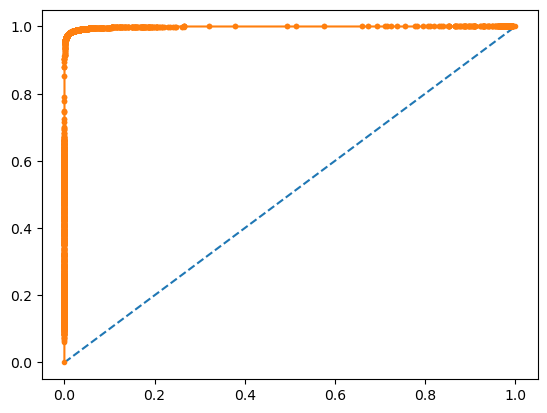

In [45]:
probs_1 = best_Grid_Bagging_DT.predict_proba(X_train)
probs_1 = probs_1[:, 1]
from sklearn.metrics import roc_auc_score
auc_1 = roc_auc_score(y_train, probs_1)
print('AUC: %.3f' % auc_1)
from sklearn.metrics import roc_curve
fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, probs_1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_1, tpr_1, marker='.')
plt.show()

AUC: 0.992


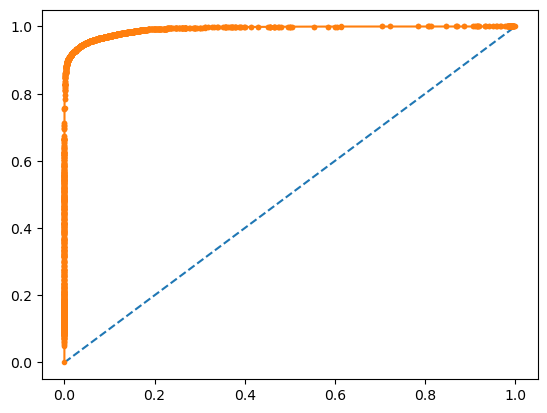

In [46]:
probs_2 = best_Grid_Bagging_DT.predict_proba(X_test)
probs_2 = probs_2[:, 1]
from sklearn.metrics import roc_auc_score
auc_2 = roc_auc_score(y_test, probs_2)
print('AUC: %.3f' % auc_2)
from sklearn.metrics import roc_curve
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, probs_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_2, tpr_2, marker='.')
plt.show()

#### Grid search on ADA Boost with decision tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada = {
        "base_estimator__max_depth": [15],
        "base_estimator__max_features": [0.3],    
        "base_estimator__min_samples_split": [2],
        "base_estimator__min_samples_leaf": [2],
        "base_estimator__criterion" : ["gini"],
        "n_estimators": [450]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto")
ABC = AdaBoostClassifier(base_estimator = DTC)
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid_ada,scoring="accuracy", verbose=1,n_jobs=-1).fit(X_train, y_train)


 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [56]:
grid_search_ABC.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 15,
 'base_estimator__max_features': 0.3,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 2,
 'n_estimators': 450}

In [57]:
best_Grid_Boost_ADA = grid_search_ABC.best_estimator_
ytrain_predict_Boost_DT = best_Grid_Boost_ADA.predict(X_train)
ytest_predict_Boost_DT = best_Grid_Boost_ADA.predict(X_test)


In [58]:
print(metrics.confusion_matrix(y_train,ytrain_predict_Boost_DT))
print(classification_report(y_train,ytrain_predict_Boost_DT))
print(" ")
print(metrics.confusion_matrix(y_test,ytest_predict_Boost_DT))
print(classification_report(y_test,ytest_predict_Boost_DT))

[[29999     0]
 [    0 36066]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29999
           1       1.00      1.00      1.00     36066

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065

 
[[12081   706]
 [  884 14643]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     12787
           1       0.95      0.94      0.95     15527

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



AUC: 0.989


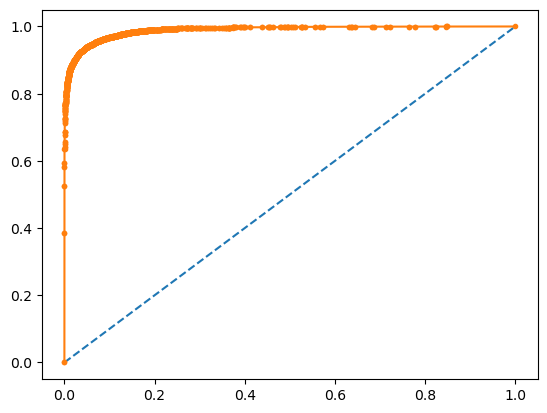

In [62]:
probs_8 = best_Grid_Boost_ADA.predict_proba(X_test)
probs_8 = probs_8[:, 1]
from sklearn.metrics import roc_auc_score
auc_8 = roc_auc_score(y_test, probs_8)
print('AUC: %.3f' % auc_8)
from sklearn.metrics import roc_curve
fpr_8, tpr_8, thresholds_8 = roc_curve(y_test, probs_8)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_8, tpr_8, marker='.')
plt.show()

### Feature importance using Decision tree classifier

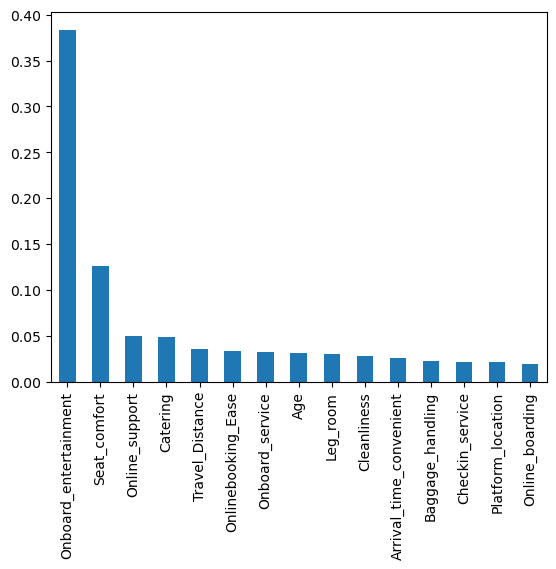

In [51]:
DTC.fit(X_train, y_train)
feat_importances = pd.Series(DTC.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='bar')
plt.show()

#### Logistic Regression

In [52]:
Logistic_model = LogisticRegression(solver='liblinear',max_iter=1000,penalty='l1',verbose=True,n_jobs=2,random_state=1)
Logistic_model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(max_iter=1000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear', verbose=True)

In [53]:
Train_predict_LG = Logistic_model.predict(X_train)
Test_predict_LG = Logistic_model.predict(X_test)

print("TRAINING DATA")
print("")
print(metrics.confusion_matrix(y_train,Train_predict_LG))   
print(metrics.classification_report(y_train,Train_predict_LG))
print("")
print("TEST DATA")
print("")
print(metrics.confusion_matrix(y_test,Test_predict_LG))   
print(metrics.classification_report(y_test,Test_predict_LG))

TRAINING DATA

[[24287  5712]
 [ 5441 30625]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     29999
           1       0.84      0.85      0.85     36066

    accuracy                           0.83     66065
   macro avg       0.83      0.83      0.83     66065
weighted avg       0.83      0.83      0.83     66065


TEST DATA

[[10377  2410]
 [ 2341 13186]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     12787
           1       0.85      0.85      0.85     15527

    accuracy                           0.83     28314
   macro avg       0.83      0.83      0.83     28314
weighted avg       0.83      0.83      0.83     28314



### Feature importance using  logistic regression model


([<matplotlib.axis.XTick at 0x218807ed4c0>,
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Travel_Distance'),
  Text(2, 0, 'DepartureDelay_in_Mins'),
  Text(3, 0, 'Seat_comfort'),
  Text(4, 0, 'Arrival_time_convenient'),
  Text(5, 0, 'Catering'),
  Text(6, 0, 'Platform_location'),
  Text(7, 0, 'Onboardwifi_service'),
  Text(8, 0, 'Onboard_entertainment'),
  Text(9, 0, 'Online_support')])

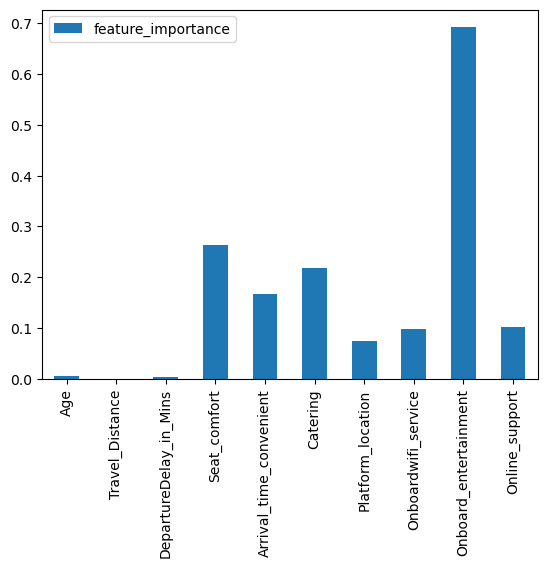

In [54]:
feature_importance_RF=pd.DataFrame({'feature':list(X.columns),'feature_importance':[abs(i) for i in Logistic_model.coef_[0]]})
feature_importance_RF.sort_values('feature_importance')
F_10 = feature_importance_RF.iloc[:10]
F_10.plot(kind = 'bar')
plt.xticks(np.arange(len(F_10['feature'])), F_10['feature'])

#### KNN Model

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

mm = StandardScaler()
X_train_KNN = mm.fit_transform(X_train)
X_test_KNN = mm.transform(X_test)
KNN_model=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_model.fit(X_train_KNN,y_train)

KNeighborsClassifier(metric='euclidean')

In [60]:
y_train_predict_KNN = KNN_model.predict(X_train_KNN)
model_score_KNN_train = KNN_model.score(X_train_KNN, y_train)
print(model_score_KNN_train)
print(metrics.confusion_matrix(y_train, y_train_predict_KNN))
print(metrics.classification_report(y_train, y_train_predict_KNN))

0.9402709452811625
[[28602  1397]
 [ 2549 33517]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     29999
           1       0.96      0.93      0.94     36066

    accuracy                           0.94     66065
   macro avg       0.94      0.94      0.94     66065
weighted avg       0.94      0.94      0.94     66065



In [61]:
y_test_predict_KNN = KNN_model.predict(X_test_KNN)
model_score_KNN_test = KNN_model.score(X_test_KNN, y_test)
print(model_score_KNN_test)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN))
print(metrics.classification_report(y_test, y_test_predict_KNN))

0.9135763226672318
[[11847   940]
 [ 1507 14020]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12787
           1       0.94      0.90      0.92     15527

    accuracy                           0.91     28314
   macro avg       0.91      0.91      0.91     28314
weighted avg       0.91      0.91      0.91     28314



### The models that we have used here are - Logistic Regression,KNN Model,Grid search on Bagging with decision tree , Grid search on ADA Boost with decision tree.
### Grid search on Bagging with decision tree: In this model we can see that it has a perfect balance of precision and Recall values on test data and it has highest accuracy of 95% (Test data) among all models. This model can be considered as the best model. The obtained AUC score of 0.992 signifies a high level of predictive accuracy and model effectiveness in correctly ranking positive instances compared to negative instances.
###  The feature importance analysis using logistic regression and decision tree classifier reveals that the onboard entertainment and seat comfort are identified as significant features in predicting the target variable.Therefore, it is recommended to pay close attention to onboard entertainment and seat comfort when making decisions or conducting further analysis.
